In [24]:
                                                        # Vaccine Management System

In [25]:
                                                                # Group 09

In [26]:
                                            # Sayam Khatri - (857)576-1143 - Khatri.say@northeastern.edu

In [27]:
                                            # Urveesh Sayane - (857)396-6520 - Sayane.u@northeastern.edu

In [28]:
# installing necesssary libraries

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



#### This line installs the mysql-connector-python package, which is a Python driver for connecting to MySQL databases.

In [31]:
import mysql.connector

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='MySQL@1234',
    database='vaccine_management_system'
)
cursor = connection.cursor()

#### This line imports the mysql.connector module, which provides the necessary functions and classes to interact with MySQL databases using Python.

#### After establishing the connection, a cursor object is created. The cursor is used to execute SQL queries and fetch results from the database

In [32]:
# Creating Dataframes for all the tables in the Database'vaccine_management_system'

In [33]:
import mysql.connector
import pandas as pd

# Function to create DataFrame from a table
def create_dataframe_from_table(connection, table_name):
    # Create a cursor
    cursor = connection.cursor()

    # Execute a query to select data from the table
    query = f"SELECT * FROM {table_name}"
    cursor.execute(query)

    # Fetch all rows from the result set
    data = cursor.fetchall()

    # Get the column names from the cursor description
    columns = [column[0] for column in cursor.description]

    # Create a DataFrame
    df = pd.DataFrame(data, columns=columns)

    # Close the cursor
    cursor.close()

    return df

# MySQL workbench connection details
host = 'localhost'
user = 'root'
password = 'MySQL@1234'
database = 'vaccine_management_system'

# Establishing a connection
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Creating DataFrames for each table
hospital_df = create_dataframe_from_table(connection, 'HOSPITAL')
doctor_df = create_dataframe_from_table(connection, 'DOCTOR')
healthcare_service_df = create_dataframe_from_table(connection, 'HEALTHCARE_SERVICE')
pharmaceutical_company_df = create_dataframe_from_table(connection, 'PHARMACEUTICAL_COMPANY')
vaccine_df = create_dataframe_from_table(connection, 'VACCINE')
inventory_df = create_dataframe_from_table(connection, 'INVENTORY')
research_company_df = create_dataframe_from_table(connection, 'RESEARCH_COMPANY')
private_research_lab_df = create_dataframe_from_table(connection, 'PRIVATE_RESEARCH_LAB')
medical_universities_df = create_dataframe_from_table(connection, 'MEDICAL_UNIVERSITIES')
organisations_camps_df = create_dataframe_from_table(connection, 'ORGANISATIONS_CAMPS')
insurance_company_df = create_dataframe_from_table(connection, 'INSURANCE_COMPANY')
person_df = create_dataframe_from_table(connection, 'PERSON')
vaccinated_by_df = create_dataframe_from_table(connection, 'VACCINATED_BY')
prescription_by_df = create_dataframe_from_table(connection, 'PRESCRIPTION_BY')

connection.close()

# Displaying the DataFrames
print("Hospital DataFrame:")
print(hospital_df)

print(" \n\n\nDoctor DataFrame:")
print(doctor_df)

print(" \n\n\nHealthcare_Service DataFrame:")
print(healthcare_service_df)

print(" \n\n\nPharmaceutical_Company DataFrame:")
print(pharmaceutical_company_df)

print(" \n\n\nVaccine DataFrame:")
print(vaccine_df)

print(" \n\n\nInventory DataFrame:")
print(inventory_df)

print(" \n\n\nResearch_Company DataFrame:")
print(research_company_df)

print(" \n\n\nPrivate_Research_Lab DataFrame:")
print(private_research_lab_df)

print(" \n\n\nMedical_Universities DataFrame:")
print(medical_universities_df)

print(" \n\n\nOrganisations_Camps DataFrame:")
print(organisations_camps_df)

print(" \n\n\nInsurance_Company DataFrame:")
print(insurance_company_df)

print(" \n\n\nPerson DataFrame:")
print(person_df)

print(" \n\n\nVaccinated_By DataFrame:")
print(vaccinated_by_df)

print(" \n\n\nPrescription_By DataFrame:")
print(prescription_by_df)

Hospital DataFrame:
   H_Id                            Name           Location       Contact
0   101       New York General Hospital       New York, NY  212-555-1234
1   102      Los Angeles Medical Center    Los Angeles, CA  213-555-5678
2   103        Chicago Community Clinic        Chicago, IL  312-555-9876
3   104          Houston Rural Hospital        Houston, TX  713-555-8765
4   105           Miami Sunset Hospital          Miami, FL  305-555-2345
5   106  San Francisco General Hospital  San Francisco, CA  415-555-8765
6   107           Dallas Medical Center         Dallas, TX  214-555-9876
7   108   Philadelphia Community Clinic   Philadelphia, PA  215-555-3456
8   109        Seattle Coastal Hospital        Seattle, WA  206-555-6789
9   110        Boston Memorial Hospital         Boston, MA  617-555-4321
 


Doctor DataFrame:
    D_Id          Name       Contact      Specialisation  H_Id
0      1     Dr. Smith  155-123-4567        Cardiologist   101
1      2   Dr. Johnson  516-2

In [34]:
# Query 1: Retrieve the number of doctors for each hospital.

Hospital Doctor Counts:
(101, 'New York General Hospital', 4)
(102, 'Los Angeles Medical Center', 2)
(103, 'Chicago Community Clinic', 2)
(104, 'Houston Rural Hospital', 0)
(105, 'Miami Sunset Hospital', 3)
(106, 'San Francisco General Hospital', 1)
(107, 'Dallas Medical Center', 2)
(108, 'Philadelphia Community Clinic', 2)
(109, 'Seattle Coastal Hospital', 3)
(110, 'Boston Memorial Hospital', 1)


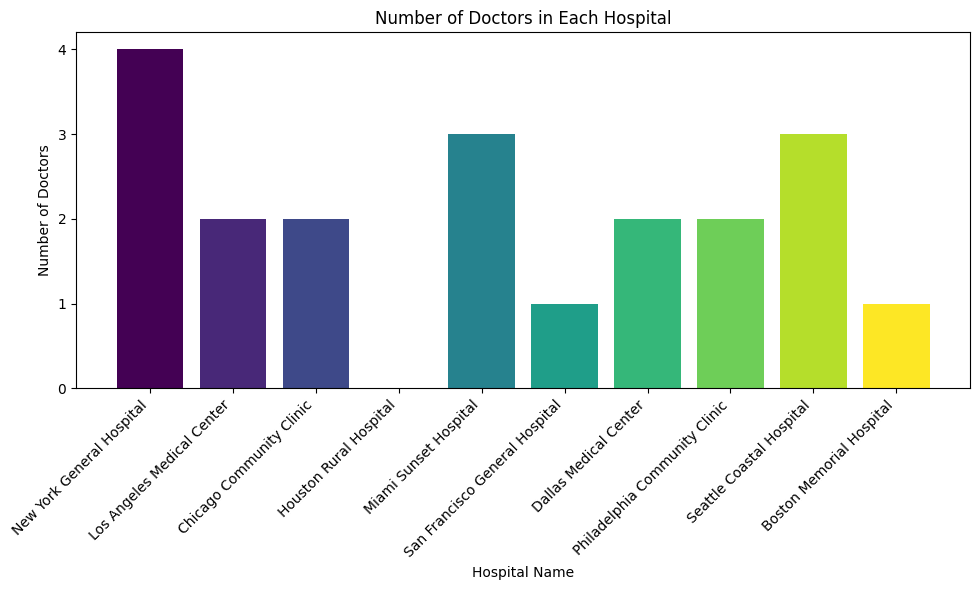

In [35]:
import matplotlib.pyplot as plt
import numpy as np

connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()
cursor.execute("SELECT H_Id,Name, (SELECT COUNT(*) FROM DOCTOR WHERE H_Id = HOSPITAL.H_Id) AS NumDoctors FROM HOSPITAL")
hospital_doctor_count = cursor.fetchall()

print("Hospital Doctor Counts:")
for row in hospital_doctor_count:
    print(row)
cursor.close()
connection.close()


# getting data for plotting
hospital_names = [row[1] for row in hospital_doctor_count]
doctor_counts = [row[2] for row in hospital_doctor_count]

colors = plt.cm.viridis(np.linspace(0, 1, len(hospital_names)))

plt.figure(figsize=(10, 6))
bars = plt.bar(hospital_names, doctor_counts, color=colors)
plt.xlabel('Hospital Name')
plt.ylabel('Number of Doctors')
plt.title('Number of Doctors in Each Hospital')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, max(doctor_counts) + 1, 1))
plt.tight_layout()
plt.show()

In [36]:
# It can be seen from the bar plot that the New York General Hospital has maximum number of doctors working in it, 
           # whereas Houston Rural Hospital has no doctors

In [37]:
# Query 2: Number of vaccinated people in different US locations.

Results of the SQL query:
('Houston, TX', 8)
('Miami, FL', 7)
('Los Angeles, CA', 6)
('Chicago, IL', 6)
('New York, NY', 5)
('Dallas, TX', 2)
('San Francisco, CA', 1)


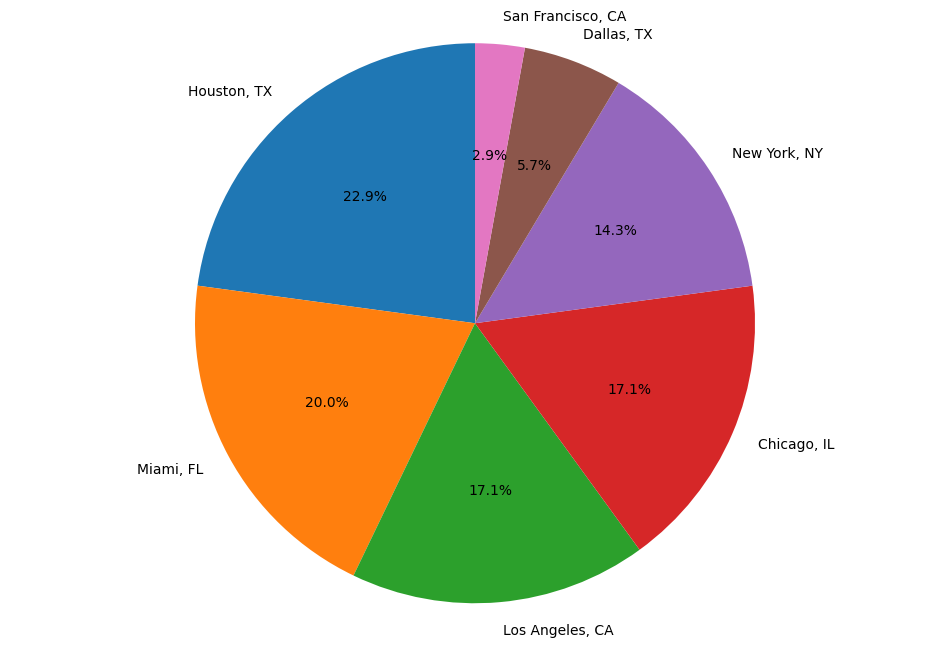

In [38]:
import mysql.connector
import matplotlib.pyplot as plt

# Establish a connection to the database
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Create a cursor
cursor = connection.cursor()

# Define the SQL query
sql_query = """
    SELECT h.Location, COUNT(*) AS VaccinatedPatients
    FROM person p
    JOIN HOSPITAL h ON p.H_Id = h.H_Id
    GROUP BY h.location
    ORDER BY COUNT(*) DESC;
"""

# Execute the SQL query
cursor.execute(sql_query)

# Fetch the results
results = cursor.fetchall()

# Print the results
print("Results of the SQL query:")
for row in results:
    print(row)

# Create a pie chart
labels = [row[0] for row in results]
sizes = [row[1] for row in results]
plt.figure(figsize=(12,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
# Show the pie chart
plt.show()

# Close the cursor and connection
cursor.close()
connection.close()


In [39]:
# Query 3: Retrieve all doctors that work in New York General Hospital.

In [40]:
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()

cursor.execute("SELECT * FROM DOCTOR WHERE H_Id = (SELECT H_Id FROM HOSPITAL WHERE Name = 'New York General Hospital')")
doctor_results = cursor.fetchall()
print("Doctors from New York General Hospital:")
for row in doctor_results:
    print(row)

Doctors from New York General Hospital:
(1, 'Dr. Smith', '155-123-4567', 'Cardiologist', 101)
(4, 'Dr. Jones', '321-456-7890', 'Neurologist', 101)
(11, 'Dr. Clark', '555-163-4568', 'Cardiologist', 101)
(14, 'Dr. Wright', '512-466-7890', 'Neurologist', 101)


In [41]:
# Query 4: Retrieve vaccination status for each person along with the hospital they got vaccinated from.

In [42]:
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()

cursor.execute("SELECT P.Name AS PersonName, P.Vaccine_status, H.Name AS HospitalName \
                FROM PERSON P \
                LEFT JOIN HOSPITAL H ON P.H_Id = H.H_Id")
person_vaccination_status = cursor.fetchall()

print("Person Vaccination Status with Hospital's Name:")
for row in person_vaccination_status:
    print(row)

cursor.close()
connection.close()

Person Vaccination Status with Hospital's Name:
('Emily Miller', 'Fully Vaccinated', 'Miami Sunset Hospital')
('John Doe', 'Fully Vaccinated', None)
('James Young', 'Fully Vaccinated', 'Houston Rural Hospital')
('Amanda Lewis', 'Fully Vaccinated', 'Chicago Community Clinic')
('Mark Davis', 'Partially Vaccinated', 'Los Angeles Medical Center')
('Karen Harris', 'Partially Vaccinated', 'Miami Sunset Hospital')
('Robert Moore', 'Fully Vaccinated', 'Houston Rural Hospital')
('John Anderson', 'Partially Vaccinated', 'Houston Rural Hospital')
('Jane Smith', 'Partially Vaccinated', None)
('Catherine Anderson', 'Fully Vaccinated', None)
('Daniel Miller', 'Fully Vaccinated', 'Houston Rural Hospital')
('Linda Wilson', 'Fully Vaccinated', 'San Francisco General Hospital')
('David Martin', 'Fully Vaccinated', 'New York General Hospital')
('Robert Johnson', 'Fully Vaccinated', 'Dallas Medical Center')
('Jennifer Taylor', 'Partially Vaccinated', 'Miami Sunset Hospital')
('Jennifer Wilson', 'Partially

In [43]:
# Query 5: Retrieve total Vaccine quantity in each Hospital.

Total Vaccine quantity for each Hospital:
('New York General Hospital', Decimal('25710'))
('Los Angeles Medical Center', Decimal('4550'))
('Chicago Community Clinic', Decimal('10760'))
('Houston Rural Hospital', Decimal('17990'))
('Miami Sunset Hospital', Decimal('11710'))
('San Francisco General Hospital', Decimal('13590'))
('Dallas Medical Center', Decimal('9390'))
('Philadelphia Community Clinic', Decimal('18710'))
('Seattle Coastal Hospital', Decimal('13730'))
('Boston Memorial Hospital', Decimal('8440'))


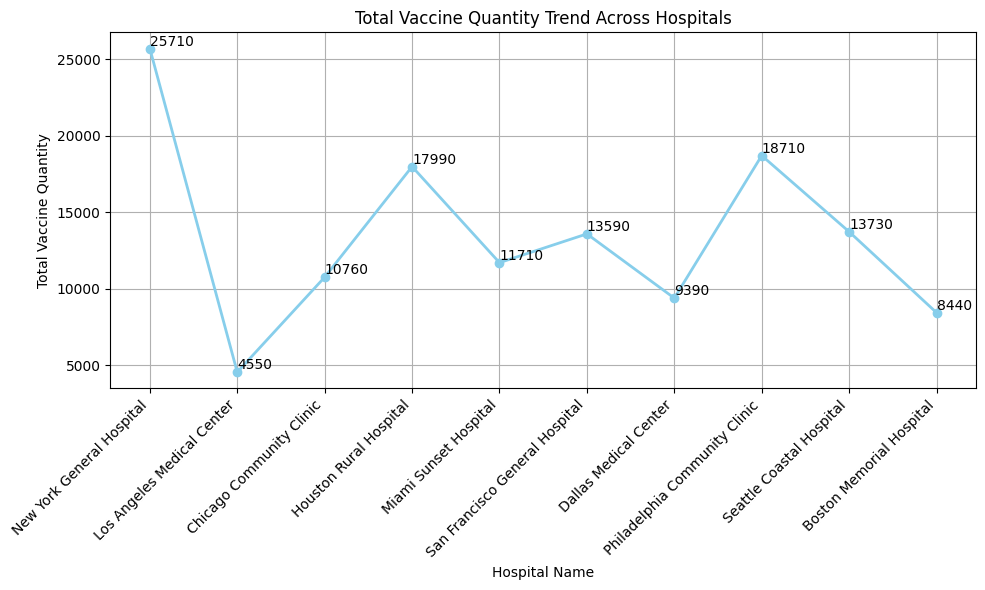

In [44]:
import mysql.connector
import matplotlib.pyplot as plt

connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()

cursor.execute("""
    SELECT H.Name AS HospitalName, SUM(I.Quantity) AS TotalVaccineQuantity
    FROM INVENTORY I
    INNER JOIN HOSPITAL H ON I.H_Id = H.H_Id
    GROUP BY H.H_Id, H.Name
""")

hospital_vaccine_data = cursor.fetchall()

print("Total Vaccine quantity for each Hospital:")
for row in hospital_vaccine_data:
    print(row)

cursor.close()
connection.close()

hospital_names = [row[0] for row in hospital_vaccine_data]
total_quantities = [row[1] for row in hospital_vaccine_data]

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(hospital_names, total_quantities, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Hospital Name')
plt.ylabel('Total Vaccine Quantity')
plt.title('Total Vaccine Quantity Trend Across Hospitals')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

for x, y in zip(hospital_names, total_quantities):
    plt.text(x, y, f'{y}', ha='left', va='bottom')

plt.tight_layout()
plt.show()

In [45]:
# Query 6: Retrieve RESEARCH COMPANIES that are neither private labs nor medical universities

In [46]:
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()

query = """
    SELECT r.rc_id, r.name
    FROM RESEARCH_COMPANY r
    WHERE r.rc_id NOT IN (
        SELECT p.prl_rc_id
        FROM PRIVATE_RESEARCH_LAB p, MEDICAL_UNIVERSITIES m
    )
    AND r.rc_id NOT IN (
        SELECT m.mu_rc_id
        FROM PRIVATE_RESEARCH_LAB p, MEDICAL_UNIVERSITIES m
    );
"""

cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)
cursor.close()
connection.close()

(1000000011, 'BioPharma Innovators')
(1000000012, 'LifeGen Solutions')
(1000000013, 'HealthLab Research')
(1000000014, 'BioQuest Innovations')
(1000000020, 'MediQuest Innovations')
(1000000030, 'MediGen Solutions')
(1000000031, 'GenoPharma Innovations')
(1000000032, 'HealthTech Labs')
(1000000033, 'BioQuest Research')
(1000000034, 'InnoMed Innovations')


In [ ]:
import pandas as pd

# Assuming you have DataFrames hospital_df, doctor_df, ..., prescription_by_df

# Specify the file paths where you want to save the CSV files on the desktop
desktop_path = r"C:\Users\urvee\Desktop"

csv_file_paths = [
    f"{desktop_path}\\hospital_df.csv",
    f"{desktop_path}\\doctor_df.csv",
    f"{desktop_path}\\healthcare_service_df.csv",
    f"{desktop_path}\\pharmaceutical_company_df.csv",
    f"{desktop_path}\\vaccine_df.csv",
    f"{desktop_path}\\inventory_df.csv",
    f"{desktop_path}\\research_company_df.csv",
    f"{desktop_path}\\private_research_lab_df.csv",
    f"{desktop_path}\\medical_universities_df.csv",
    f"{desktop_path}\\organisations_camps_df.csv",
    f"{desktop_path}\\insurance_company_df.csv",
    f"{desktop_path}\\person_df.csv",
    f"{desktop_path}\\vaccinated_by_df.csv",
    f"{desktop_path}\\prescription_by_df.csv"
]

# Save each DataFrame as a CSV file
for df, csv_path in zip(
    [hospital_df, doctor_df, healthcare_service_df, pharmaceutical_company_df, vaccine_df,
     inventory_df, research_company_df, private_research_lab_df, medical_universities_df,
     organisations_camps_df, insurance_company_df, person_df, vaccinated_by_df, prescription_by_df],
    csv_file_paths
):
    df.to_csv(csv_path, index=False)

print("DataFrames converted to CSV files on the desktop successfully.")